In [1]:
from keras.layers import Input
from keras.layers import Conv2D, MaxPool2D, Dense, BatchNormalization, Activation, add, GlobalAvgPool2D,Dropout,Flatten
from keras.models import Model,Sequential
from keras import regularizers
from keras.utils import plot_model
from keras import backend as K
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import tensorflow
from tensorflow.examples.tutorials.mnist import input_data
from keras.utils.np_utils import to_categorical 
mnist = input_data.read_data_sets('MNIST_data')

Using TensorFlow backend.
E:\ana\envs\NiftyNet\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
E:\ana\envs\NiftyNet\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
E:\ana\envs\NiftyNet\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
E:\ana\envs\NiftyNet\lib\site-packages\tensorflow\python\framework\dtypes.py:519: FutureWarn

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [2]:
mnist.train.images.shape
img=np.zeros((55000,28,28,1))

In [3]:
for i in range(55000):
    img[i]=mnist.train.images[i].reshape(28,28,1)
img.shape
#载入训练集


(55000, 28, 28, 1)

In [4]:
tt=np.zeros((10000,28,28,1))
for i in range(10000):
    tt[i]=mnist.test.images[i].reshape(28,28,1)

In [5]:
model = Sequential()

model.add(Conv2D(32, kernel_size = 3, activation='relu', input_shape = (28, 28, 1)))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(32, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 3, activation='relu'))
model.add(BatchNormalization())
model.add(Conv2D(64, kernel_size = 5, strides=2, padding='same', activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Conv2D(128, kernel_size = 4, activation='relu'))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))








Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
model.compile(loss="categorical_crossentropy",optimizer="adam", metrics=["accuracy"])
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 32)        25632     
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________

In [7]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        rotation_range=10,  
        zoom_range = 0.10,  
        width_shift_range=0.1, 
        height_shift_range=0.1)

In [8]:
imgy=to_categorical(mnist.train.labels,num_classes=10)

In [9]:
tt_label=to_categorical(mnist.test.labels,num_classes=10)

In [24]:
from keras.callbacks import LearningRateScheduler
def scheduler(epoch):
    if epoch % 5 == 0 and epoch != 0:
        lr = K.get_value(model.optimizer.lr)
        K.set_value(model.optimizer.lr, lr * 0.5)
        print("lr changed to {}".format(lr * 0.5))
    return K.get_value(model.optimizer.lr)
 
reduce_lr = LearningRateScheduler(scheduler)

In [ ]:
hist=model.fit_generator(datagen.flow(img,imgy, batch_size=64),
        epochs = 10, steps_per_epoch = img.shape[0]//64, callbacks=[reduce_lr], 
        validation_data = (tt,tt_label),verbose=2)

Epoch 1/10
 - 14s - loss: 0.0132 - acc: 0.9962 - val_loss: 0.0106 - val_acc: 0.9971
Epoch 2/10
 - 12s - loss: 0.0136 - acc: 0.9959 - val_loss: 0.0109 - val_acc: 0.9970
Epoch 3/10
 - 12s - loss: 0.0142 - acc: 0.9959 - val_loss: 0.0100 - val_acc: 0.9972
Epoch 4/10
 - 12s - loss: 0.0134 - acc: 0.9958 - val_loss: 0.0102 - val_acc: 0.9971
Epoch 5/10
 - 12s - loss: 0.0137 - acc: 0.9961 - val_loss: 0.0104 - val_acc: 0.9970
Epoch 6/10
lr changed to 1.5625000742147677e-05
 - 12s - loss: 0.0142 - acc: 0.9957 - val_loss: 0.0102 - val_acc: 0.9969
Epoch 7/10


In [19]:
model.save('9970.h5')

In [20]:
final_loss, final_acc = model.evaluate(tt, tt_label, verbose=0)
print("Final loss: {0:.4f}, final accuracy: {1:.4f}".format(final_loss, final_acc))

Final loss: 0.0105, final accuracy: 0.9970


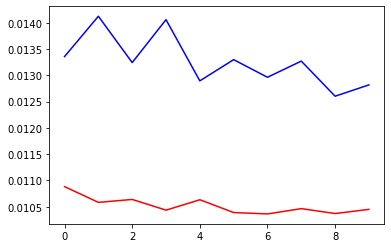

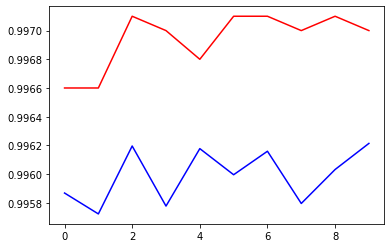

In [21]:
plt.plot(hist.history['loss'], color='b')
plt.plot(hist.history['val_loss'], color='r')
plt.show()
plt.plot(hist.history['acc'], color='b')
plt.plot(hist.history['val_acc'], color='r')
plt.show()

In [ ]:
from keras import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Softmax,Activation,Dense
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.utils.np_utils import to_categorical
from keras.datasets import mnist
import matplotlib.pyplot as plt
#from sklearn.metrics import recall_score,f1_score,precision_score
import tensorflow
from keras.datasets import mnist
(x_train, labels_train), (x_test, labels_test) = mnist.load_data()
 
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
from keras.utils import to_categorical
y_train = to_categorical(labels_train, 10)
y_test = to_categorical(labels_test, 10)
 
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
 
from keras.models import load_model
model = load_model("[1870741]part4.h5")
 
import numpy as np
 
outputs=model.predict(x_test)
labels_predicted=np.argmax(outputs, axis=1)
misclassified=sum(labels_predicted!=labels_test)
print('Percentage misclassified = ',100*misclassified/labels_test.size)
 
plt.figure(figsize=(8, 2))
for i in range(0,8):
    ax=plt.subplot(2,8,i+1)
    plt.imshow(x_test[i,:].reshape(28,28), cmap=plt.get_cmap('gray_r'))
    plt.title(labels_test[i])
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
for i in range(0,8):
#output = net.predict(x_test[i,:].reshape(1, 784)) #if MLP
    output = model.predict(x_test[i,:].reshape(1, 28,28,1)) #if CNN
    output=output[0,0:]
    plt.subplot(2,8,8+i+1)
    plt.bar(np.arange(10.),output)
    plt.title(np.argmax(output))

Using TensorFlow backend.
/Users/wilson/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/wilson/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/wilson/opt/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/wilson/opt/anaconda3/lib/python3.7